## 자동차 연비 데이터셋

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/auto+mpg)에서 다운로드
 
 
- [Kaggle](https://www.kaggle.com/)의
[Auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset)에서 다운로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. 데이터 탐색

#### 1.1 데이터 적재

In [2]:
df = pd.read_csv("datasets/auto-mpg.csv", header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


#### 1.2 데이터 일부 확인

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


0. mpg: continuous
1. cylinders: multi-valued discrete
2. displacement: continuous
3. horsepower: continuous
4. weight: continuous
5. acceleration: continuous
6. model year: multi-valued discrete
7. origin: multi-valued discrete
8. car name: string (unique for each instance)

#### 1.3 열 이름 지정

* 예 : ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

In [11]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


- mpg : 연비
- cylinders : 실린더수 
- displacement : 배기량
- horsepower: 출력
- weight : 차중
- acceleration : 가속능력
- model year : 출시년도
- origin : 제조국 1(USA), 2(EU), 3(JPN)
- name : 모델명

#### 1.4 데이터 형상 확인

In [12]:
df.shape

(398, 9)

#### 1.5 데이터 요약정보 확인(데이터 타입, 누락정보)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   name          398 non-null    object  
 9   country       398 non-null    category
dtypes: category(1), float64(4), int64(3), object(2)
memory usage: 28.6+ KB


#### 1.6 데이터 자료형 확인 

In [33]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight           float64
acceleration     float64
model year         int64
origin             int64
name              object
country         category
dtype: object

#### 1.7 Series(horsepower 열)의 자료형 확인 

In [35]:
df["horsepower"].dtypes

dtype('O')

* (Question) horsepower는 숫자 데이터인데 왜 object 형으로 반환되었을까?

- (Answer) 숫자가 아닌 값이 들어있기 때문에

#### 1.8 제조국(origin) 특성의 데이터 분포(건수) 확인하기
- 1(USA), 2(EU), 3(JPN)

In [37]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [25]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

#### 1.9 제조국(origin) 특성을 histogram으로 표현하기

<AxesSubplot:>

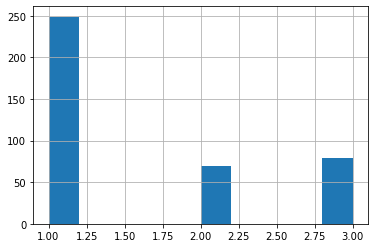

In [26]:
df_ori = df['origin']
df_ori.hist()

<AxesSubplot:ylabel='Frequency'>

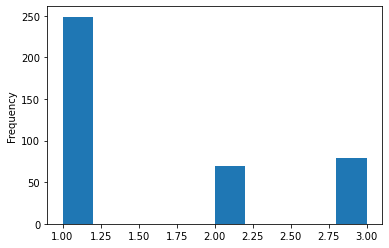

In [38]:
df["origin"].plot(kind="hist")

#### 1.10 country 컬럼 추가하기
* 제조국 1, 2, 3을 각각 "USA", "Europe", "Japan"으로 대체한 값 적용

- pd.cut(데이터, 구간의 갯수, 레이블 명) : 수치형 변수를 특정 구간으로 나누어 범주형 레이블로 생성해주기

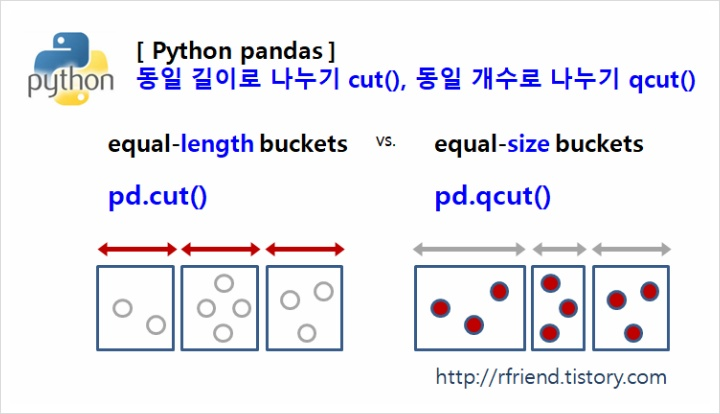

In [29]:
cats = pd.cut(df['origin'], 3, labels = ['USA', 'Europe', 'Japan'])
cats

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: origin, Length: 398, dtype: category
Categories (3, object): ['USA' < 'Europe' < 'Japan']

In [31]:
df['country'] = cats
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,country
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,USA
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,USA
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,USA


In [40]:
# replace() 사용하는 방법
df["country"] = df["origin"].replace([1, 2, 3],  ["USA", "Europe", "Japan"])
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,country
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,USA
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,USA
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,USA
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10,USA


* coutry 특성으로 groupby하여 "국가당 몇건"의 샘플이 있는지 확인하기

In [41]:
df.groupby("country").size()

country
Europe     70
Japan      79
USA       249
dtype: int64

In [42]:
df["country"].value_counts()

USA       249
Japan      79
Europe     70
Name: country, dtype: int64

- 위에서 구한 국가당 레코드수를 파이차트 그리기

In [44]:
country = df.groupby('country').size()
country

country
Europe     70
Japan      79
USA       249
dtype: int64

<AxesSubplot:ylabel='None'>

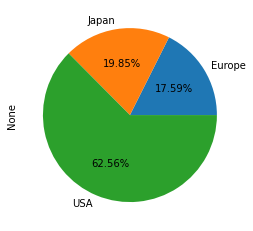

In [47]:
country.plot(kind = 'pie', autopct="%.2f%%")

#### 1.11 국가별(coutry) mpg 값의 분포를 boxplot으로 확인하기
- (Question) mpg의 중간값이 가장 낮은 국가는?
- (Answer) USA : 2분위수(중앙값)가 가장 낮게 위치해 있으므로

<AxesSubplot:xlabel='country', ylabel='mpg'>

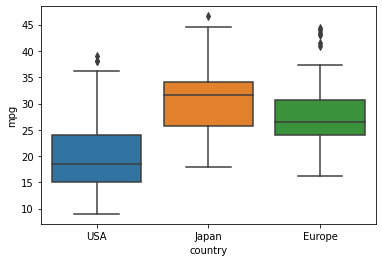

In [49]:
sns.boxplot(x="country", y="mpg", data=df)

#### 1.12 통계 정보 확인 

In [50]:
# 수치형 데이터로만 구성되어있는 것을 확일 할 수 있음
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### 1.13 특성들 간의 상관관계 구하기 

- 상관계수 매트릭스 : df.corr() 이용

In [51]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


- (시각화 1) 상관계수 산점도로 시각화 하기 : pd.plotting.scatter matrix()

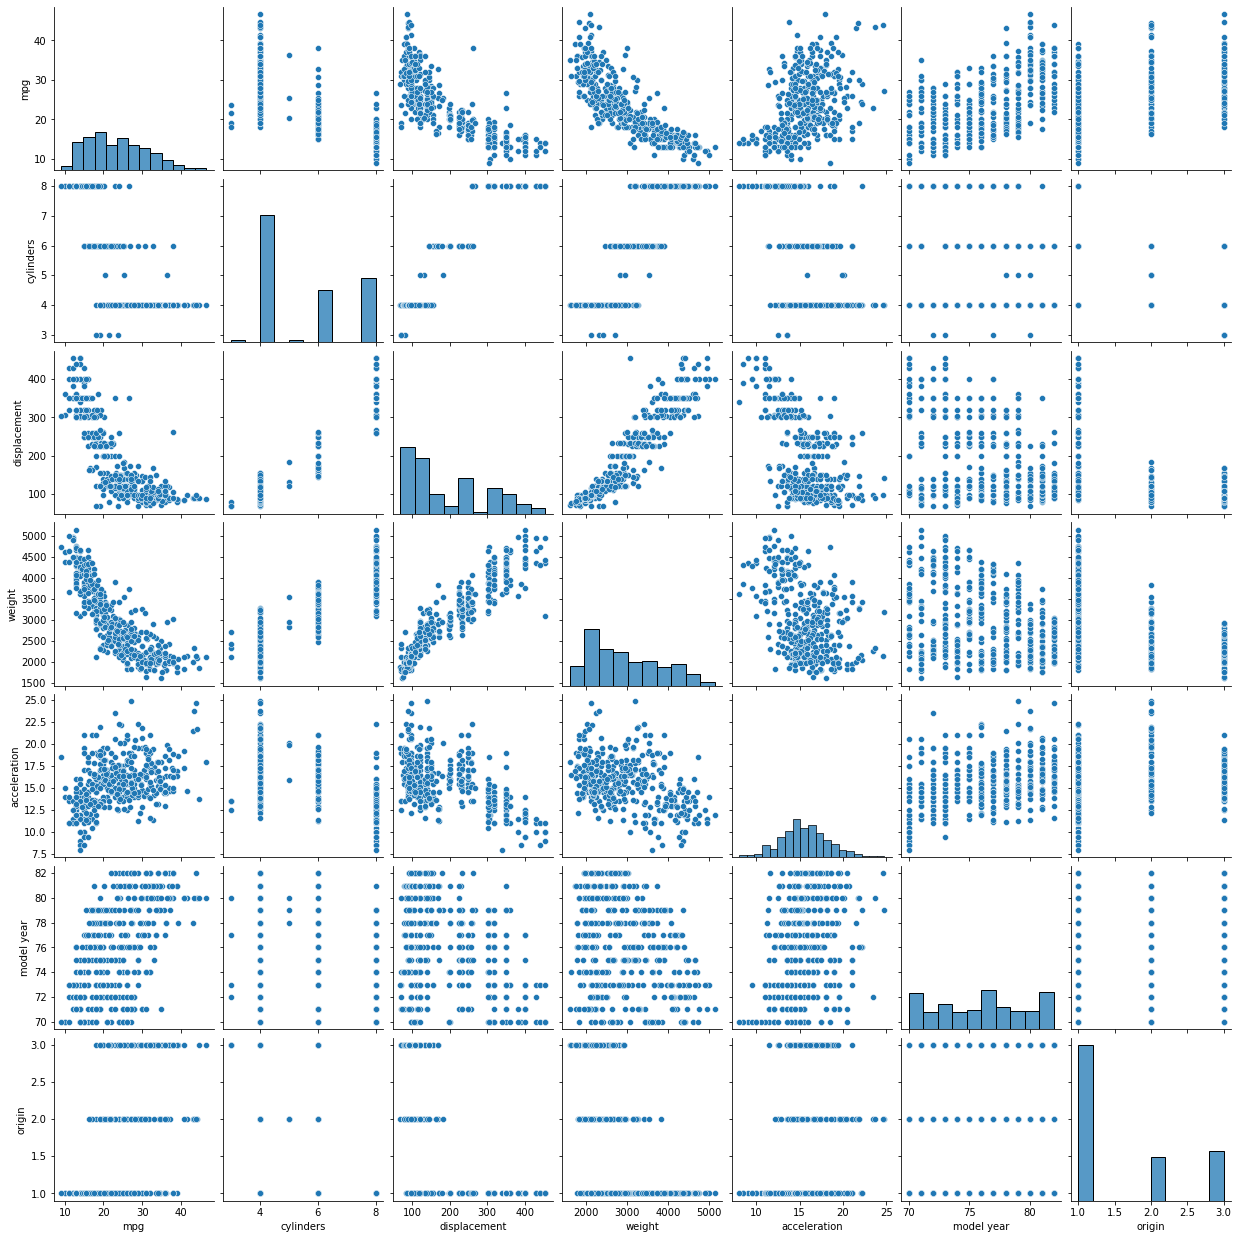

In [60]:
sns.pairplot(df)

In [ ]:
# pandas 산점도
pd.plotting.scatter_matrix(df[["mpg", "cylinders", "displacement", "weight", "acceleration", "model year", "origin"]], 
                           figsize = (24, 16))

- (시각화 2) 상관계수 히트맵으로 시각화하기

<AxesSubplot:>

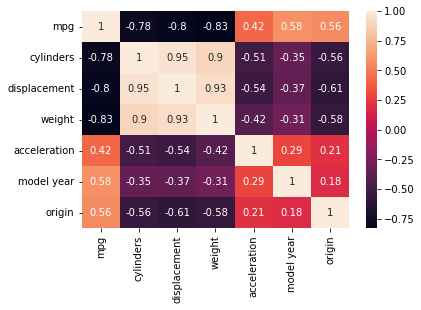

In [70]:
sns.heatmap(df.corr(), annot=True)

* (Question) 타깃(mpg)와의 상관계수가 가장 높은 특성은?
* (Answer) weight가 mpg와의 음의 상관관계가 높다.

* [컬러맵 정보](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

- weight 특성과, mpg(타깃) 의 상관관계 및 산점도

In [71]:
df_wm = df[['weight','mpg']].corr()
df_wm

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


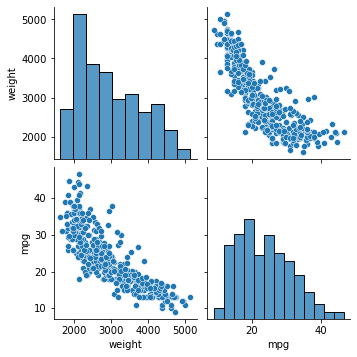

In [69]:
sns.pairplot(df[['weight','mpg']])

<AxesSubplot:xlabel='weight', ylabel='mpg'>

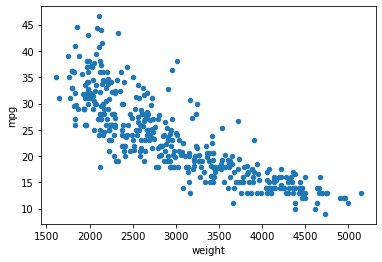

In [72]:
df.plot(kind = "scatter", x="weight", y="mpg")